For analysis we are going to use a titanic dataset for ML classification. 
- Going to predict the classification on survival or the desesed for passengers

Titanic : ML for Disaster

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
%matplotlib inline

In [55]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here, Survived 0 means didn't survive, 1 means survived.

### Exploratory Data Analysis

Most of the time dataset consists of null values, so in order to see that let's use heatmap.

In [56]:
train.isnull() # if True, it doesnot contain data.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
null_embarked = train['Embarked'].isnull()
null_embarked


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [58]:
# Count null values in each column

null_count = null_embarked.sum()
null_count

2

In [59]:
# Filter the rows where 'Embarked' is null
null_embarked_rows = train[null_embarked]

# Now 'null_embarked_rows' contains the rows with null values in the 'Embarked' column
print(null_embarked_rows)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


<AxesSubplot:>

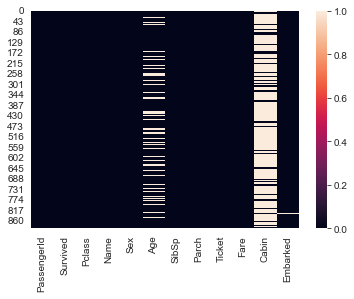

In [60]:
sns.heatmap(train.isnull())

<AxesSubplot:>

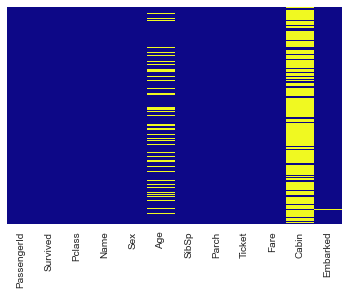

In [63]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

# When you set 'yticklabels' to 'False', it means you don't want y-axis tick labels to be disolayed.
# cbar is for color bar; provides a visual representation of how data values correspond to colors in the visualization.
# cmap: color map : set of colors used to represent data values in a heatmap

From above heatmap, we can see lot of cabin information and some of ages are not present.

### Plot


In [14]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

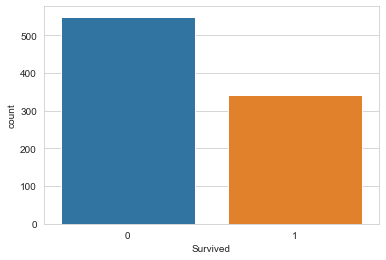

In [15]:
sns.countplot(x = 'Survived', data= train)

Count of people survived and deceased. 0 represents deceased and 1 represent survived.

#### Count of survivor by gender


<AxesSubplot:xlabel='Survived', ylabel='count'>

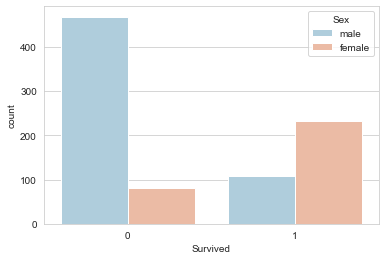

In [67]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette='RdBu_r')

#### What led someone to survive? Is it based on passanger class or other factor?


<AxesSubplot:xlabel='Survived', ylabel='count'>

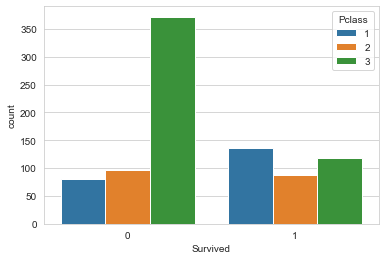

In [71]:
sns.countplot(x='Survived', data= train, hue='Pclass')

From above chart, you can see the green bar has the highest deceased count and it represents the Passenger class 3. However, the people from the P class 1 has survived more.

#### Age of people in the titanic :

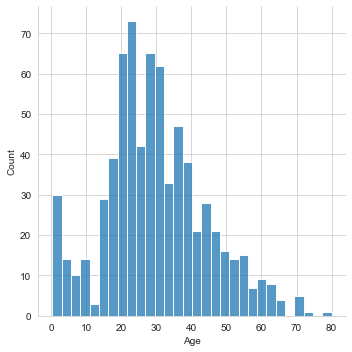

In [78]:
sns.displot(train['Age'].dropna(), kde= False, bins=30)

There are quite a few young passenger towards 0 and 10. The adult people of age group 20-40 are higher in number.

<AxesSubplot:ylabel='Frequency'>

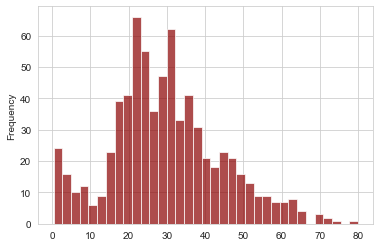

In [103]:
train['Age'].plot.hist(bins=35, color='darkred', alpha=0.7)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Explore SibSp and Parch

<AxesSubplot:xlabel='SibSp', ylabel='count'>

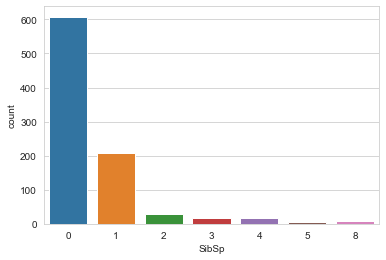

In [90]:
sns.countplot(x='SibSp', data= train) #SibSp - Siblings/Spouses

<AxesSubplot:xlabel='Parch', ylabel='count'>

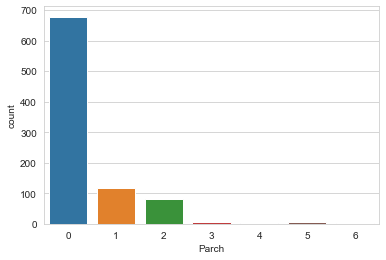

In [91]:
sns.countplot(x='Parch', data= train) #Parch : parent/Children

Most people onboard didnot have neither children or spouse onboard. many people were Single.

<AxesSubplot:xlabel='Parch', ylabel='count'>

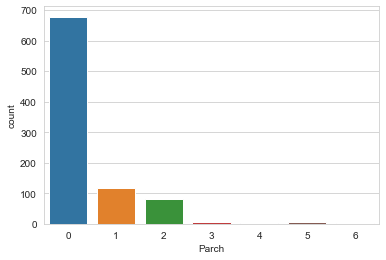

In [93]:
sns.countplot(x='Parch', data= train)

#### People paid for fare:

<AxesSubplot:>

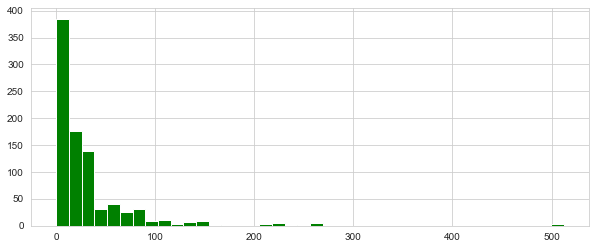

In [104]:
train['Fare'].hist(bins=40, figsize = (10,4), color='green')

#### Cufflinks for plots

In [106]:
import cufflinks as cf
cf.go_offline()

In [107]:
train['Fare'].iplot(kind = 'hist', bins = 30, color='green')